## MaxCut hardware graphs: Native, non-native
1. Cirq supports current NISQ hardware which consist of a 2D lattice architecture supporting nearest neighbor qubit connectvitiy
    - We should take into account that there is no all-to-all connectivity on NISQ devices so __SWAP networks MUST be introduced__ for non-native hardware graphs
2. We can apply hardware-native graphs, or graphs that directly map to the physical qubits, on these NISQ chips fairly seamlessly 
3. Cirq specific Google Devices:
    - Sycamore: 54 qubits
    - Sycamore23: 23 qubits
    - Bristlecone: 72 qubita
    - Foxtail: 2x11 XMON device, 22 qubit
4. We can also just create a set of qubits with .GridQubit(), .LineQubit() but it is easier to visualize the physical architecture by using a specific google device
    - __This can be easier for the implementation of swap networks__

In [1]:
# Import necessary libraries
import cirq
import networkx as nx
import matplotlib.pyplot as plt
import sympy

# Visualizing circuits
from  cirq.contrib.svg import SVGCircuit

### Subsetting google devices in Cirq for speicfic MaxCut instances
1. We can use some subset of qubits in any of the google devices to represent our hardware-native MaxCut graph


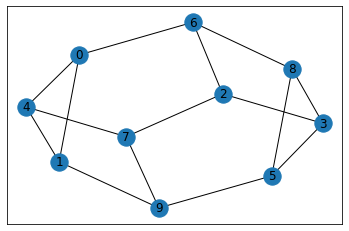

In [4]:
# Visualize a 10 node, 3-regular unweighted graph (10n-u3R)
maxcut_graph = nx.random_regular_graph(n=10, d=3)
nx.draw_networkx(maxcut_graph)

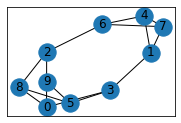

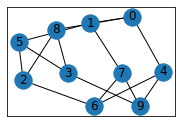

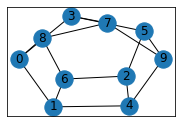

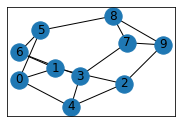

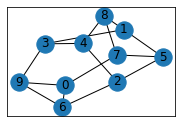

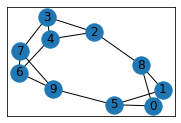

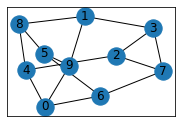

In [5]:
# Generate 8 random 6n-u3R graphs
maxcut_set = []
for i in range(7):
    maxcut_instance = nx.random_regular_graph(n=10, d=3)
    maxcut_set.append(maxcut_instance)
    
for graph in maxcut_set:
    fig, ax = plt.subplots(1, 1, figsize=(3, 2));
    nx.draw_networkx(graph, ax=ax)
    

2. There's a 1:1 mapping for the qubits to nodes for the every MaxCut instance so we can now subset any of the google devices and use these as our vertices

In [6]:
print(cirq.google.Sycamore23)

# Pre-labelled qubit order
for q in cirq.google.Sycamore23.qubits:
    print(q)

                  (3, 2)
                  │
                  │
         (4, 1)───(4, 2)───(4, 3)
         │        │        │
         │        │        │
(5, 0)───(5, 1)───(5, 2)───(5, 3)───(5, 4)
         │        │        │        │
         │        │        │        │
         (6, 1)───(6, 2)───(6, 3)───(6, 4)───(6, 5)
                  │        │        │        │
                  │        │        │        │
                  (7, 2)───(7, 3)───(7, 4)───(7, 5)───(7, 6)
                           │        │        │
                           │        │        │
                           (8, 3)───(8, 4)───(8, 5)
                                    │
                                    │
                                    (9, 4)
(3, 2)
(4, 1)
(4, 2)
(4, 3)
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(7, 6)
(8, 3)
(8, 4)
(8, 5)
(9, 4)


In [7]:
# Subset the first 10 qubits to use for our maxcutgraph
subset_qubits = cirq.google.Sycamore23.qubits[:10]

print(f'Total qubits:{len(subset_qubits)}')
for q in subset_qubits:
    print(q)

Total qubits:10
(3, 2)
(4, 1)
(4, 2)
(4, 3)
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(6, 1)


3. An alternate method is to create a line of qubits and manipulate them accordingly

In [ ]:
# Create a linear array of qubits suited for SWAP networks
qubit_map = cirq.GridQubit.rect(1, 10)

# Has this physical architecture
#G = nx.graph()
#G.add_node_from(range(10))
#G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9)])
#nx.draw_networkx(maxcut_graph, ax=ax)

3. It's important to distinguish the physical qubit connectivity to the logical qubit connectivity

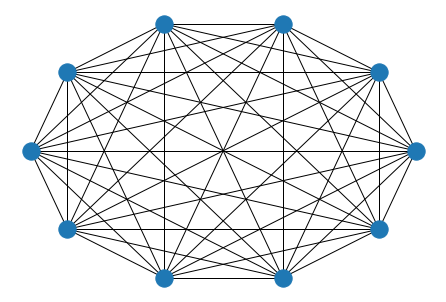

In [16]:
# All quantum circuit models assume all-to-all connectivity
maxcut_graph2 = nx.random_regular_graph(n=10, d=9)
nx.draw_circular(maxcut_graph2)

In [12]:
clear(qaoa_circuit)

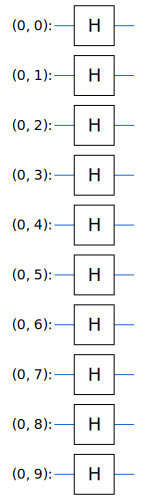

In [13]:
qaoa_circuit = cirq.Circuit()

# Hadamard transform for initial superposition
for q in qubit_map:
    qaoa_circuit.append(cirq.H(q))


SVGCircuit(qaoa_circuit)

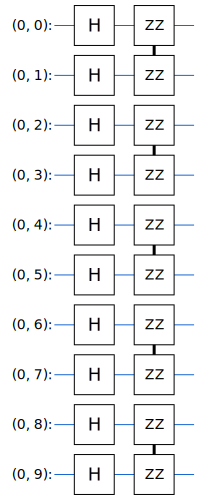

In [14]:
# Constructing the cost hamiltonian
qaoa_circuit.append([cirq.ZZ(qubit_map[0],qubit_map[1]),
                    
                    cirq.ZZ(qubit_map[2],qubit_map[3]),
                    
                    cirq.ZZ(qubit_map[4],qubit_map[5]),
                    
                    cirq.ZZ(qubit_map[6],qubit_map[7]), 
                    cirq.ZZ(qubit_map[8],qubit_map[9])])

#for q in qubit_map[::2]:
#    qaoa_circuit.append(cirq.rz(q))
SVGCircuit(qaoa_circuit)

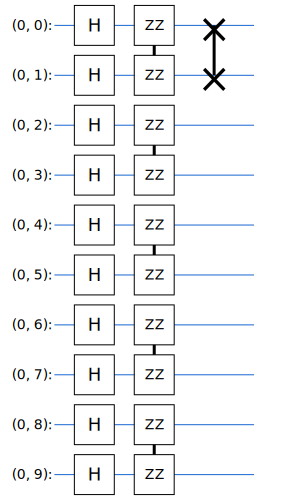

In [17]:
# Now use a SWAP network for the adjacency of logical info on 
# the physical hardware
qaoa_circuit.append(cirq.SWAP(qubit_map[0], qubit_map[1]))
SVGCircuit(qaoa_circuit)